In [3]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.utils  import to_categorical
import pickle

In [7]:
def load_rand():
    X=[]
    dir_path='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [17]:
X=load_rand()

  0%|          | 0/6 [00:00<?, ?it/s]

freshapple
freshbanana


 33%|███▎      | 2/6 [00:00<00:00,  9.71it/s]

freshguava


 67%|██████▋   | 4/6 [00:01<00:01,  1.94it/s]

rottenapple
rottenbanana


 83%|████████▎ | 5/6 [00:02<00:00,  1.77it/s]

rottenguava


100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


In [18]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [19]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshapple','freshbanana','freshguava','rottenapple','rottenbanana','rottenguava']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

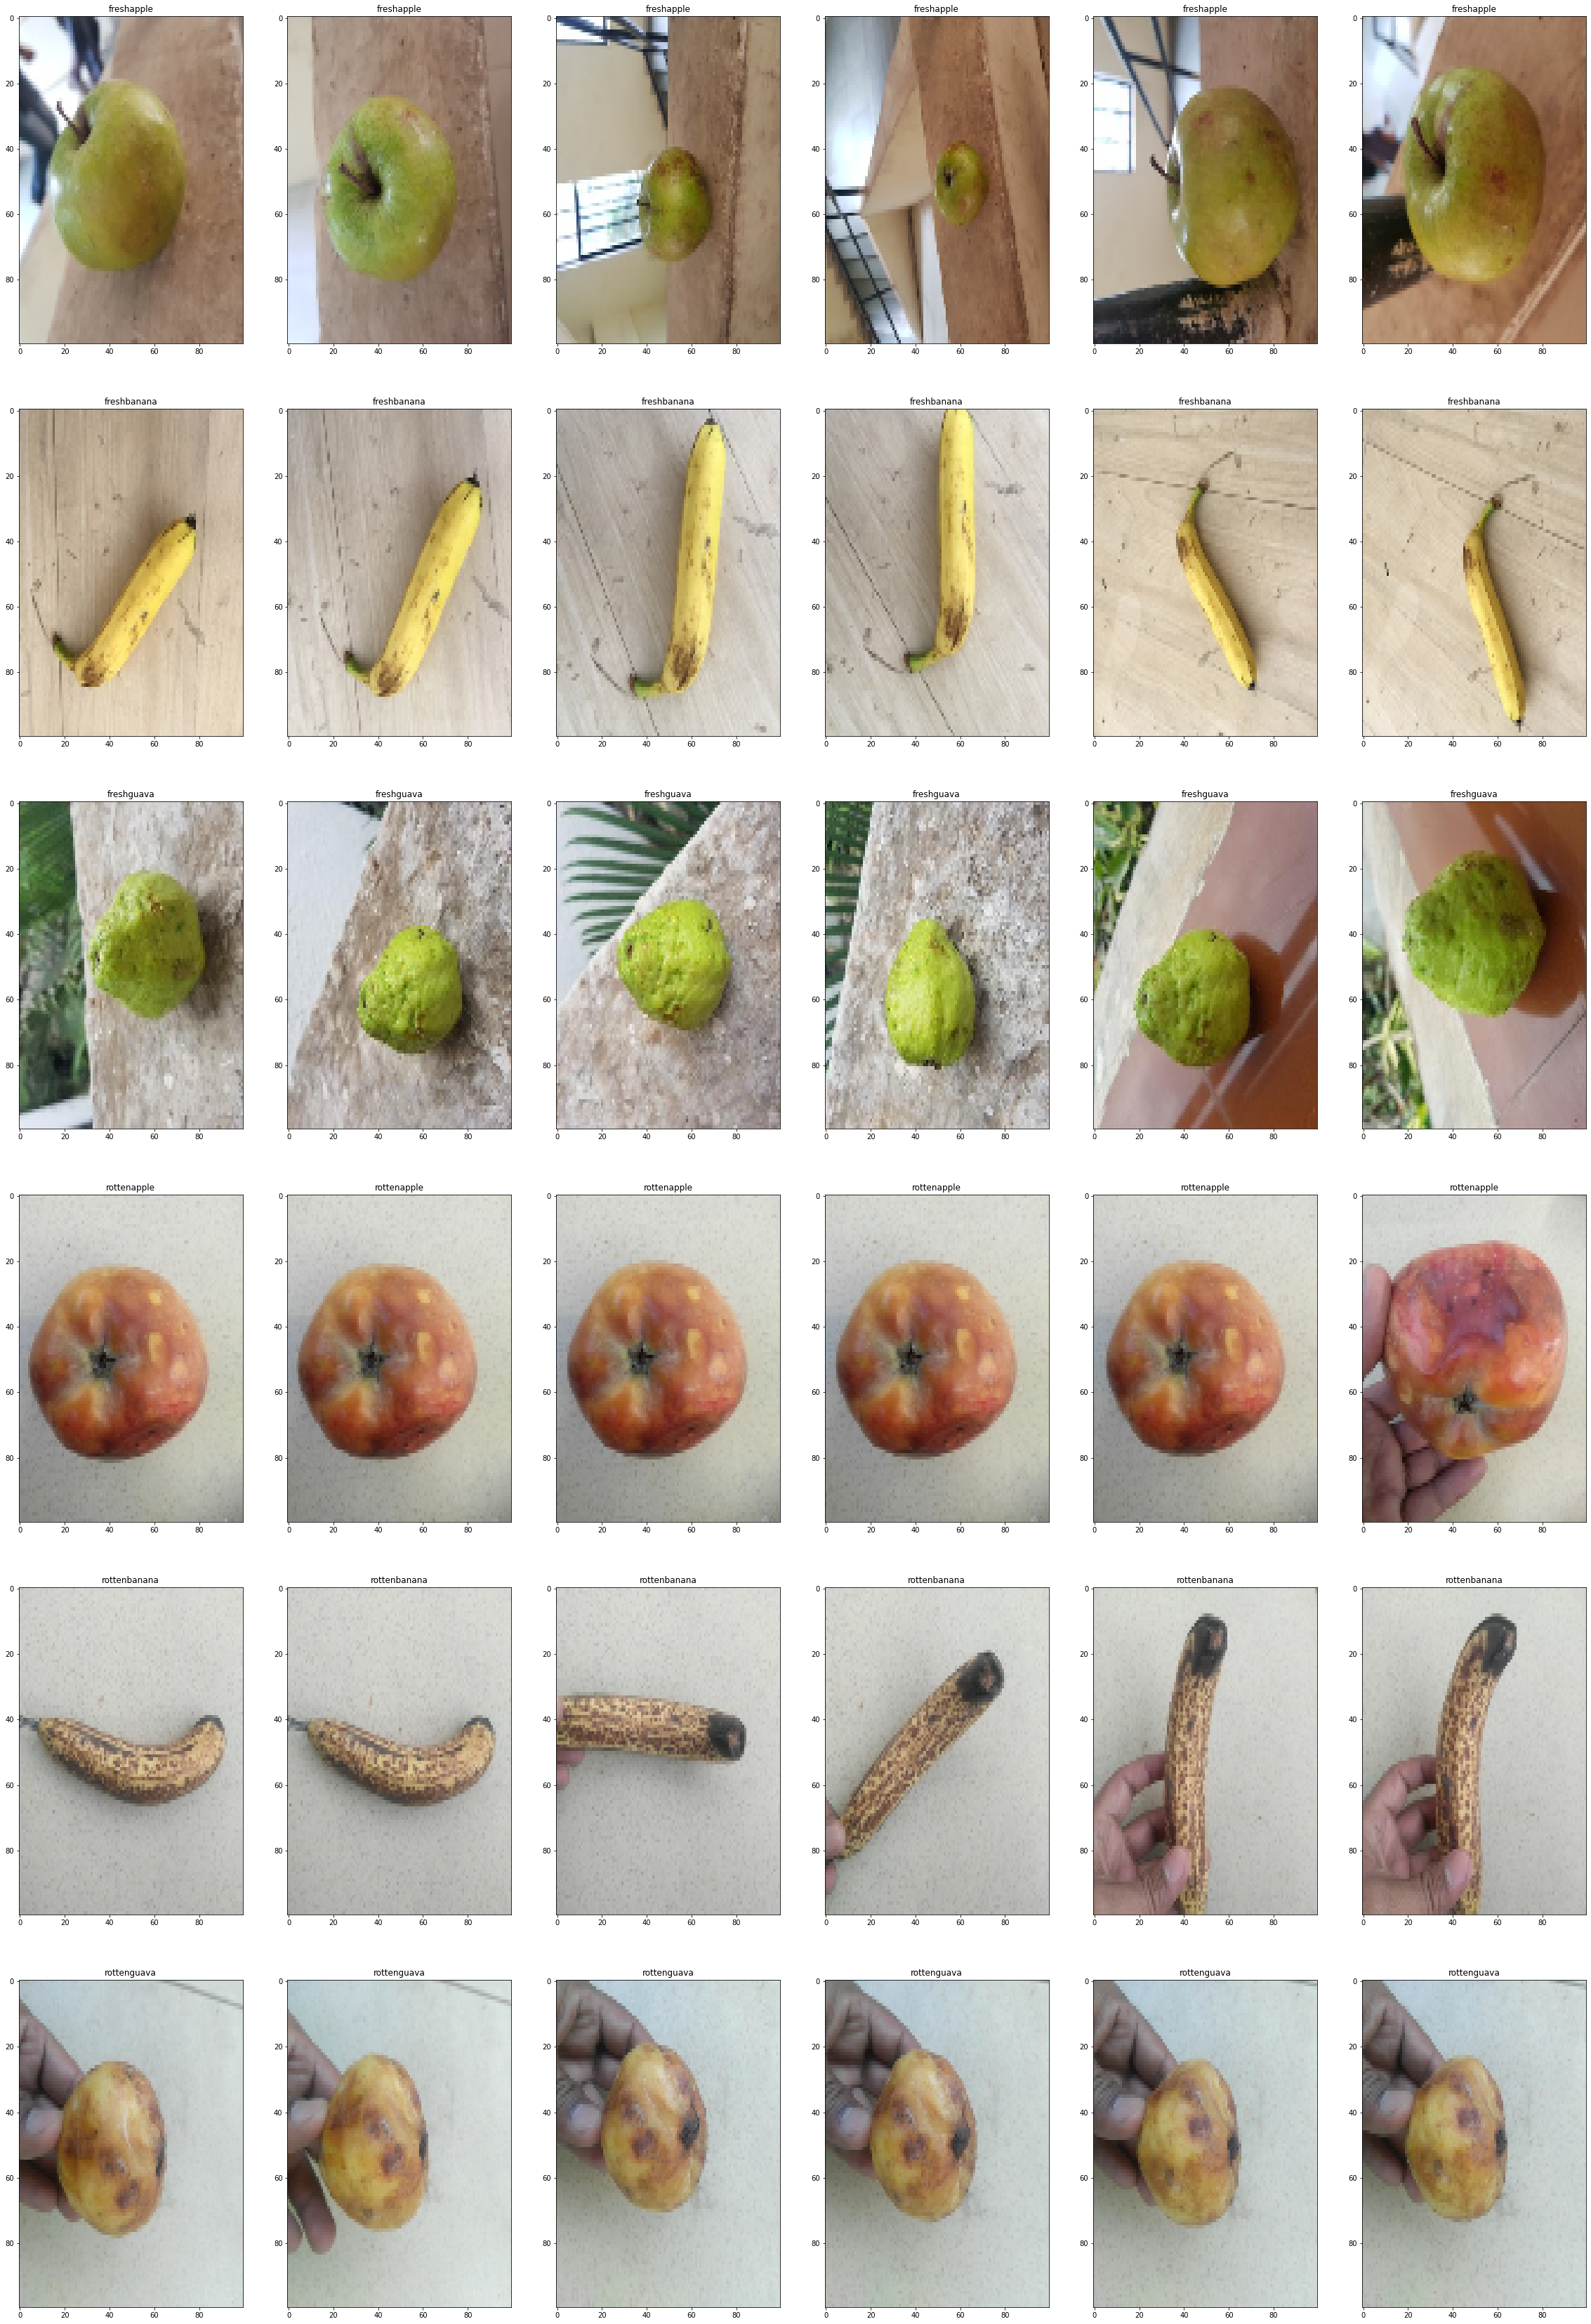

In [20]:
show_subpot(X)

In [21]:
del X

# Rotten vs fresh

In [22]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [23]:
X,Y=load_rottenvsfresh()

100%|██████████| 4200/4200 [00:00<00:00, 246917.43it/s]

Shuffling your data.....


In [26]:
Y=np.array(Y)
X=np.array(X)

In [27]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    2100
1    2100
dtype: int64

In [30]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [31]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 1800/1800 [00:00<00:00, 901032.01it/s]

Shuffling your data.....


In [32]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    900
1    900
dtype: int64

In [33]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [34]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 64)        2

In [36]:
import tensorflow as tf

In [37]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rotten.h6', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = 'adam', metrics=['accuracy'])

In [38]:
X=X/255.0
X_val=X_val/255.0

In [39]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
210/210 [==============================] - 172s 618ms/step - loss: 0.7036 - accuracy: 0.8708 - val_loss: 7.6098 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 7.60981, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten.h6
INFO:tensorflow:Assets written to: C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten.h6\assets
Epoch 2/5
210/210 [==============================] - 129s 613ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 1.0534 - val_accuracy: 0.6711

Epoch 00002: val_loss improved from 7.60981 to 1.05341, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten.h6
INFO:tensorflow:Assets written to: C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\rotten.h6\assets
Epoch 3/5
210/210 [==============================] - 132s 629ms/step - loss: 0.1826 - accuracy: 0.9536 - val_loss: 1.4435 - val_accuracy: 0.8494

Epoch 00003: val_loss did not improve from 1.05341
Epoch 4/5
210/210 [==============================] - 131s 625ms/step - 

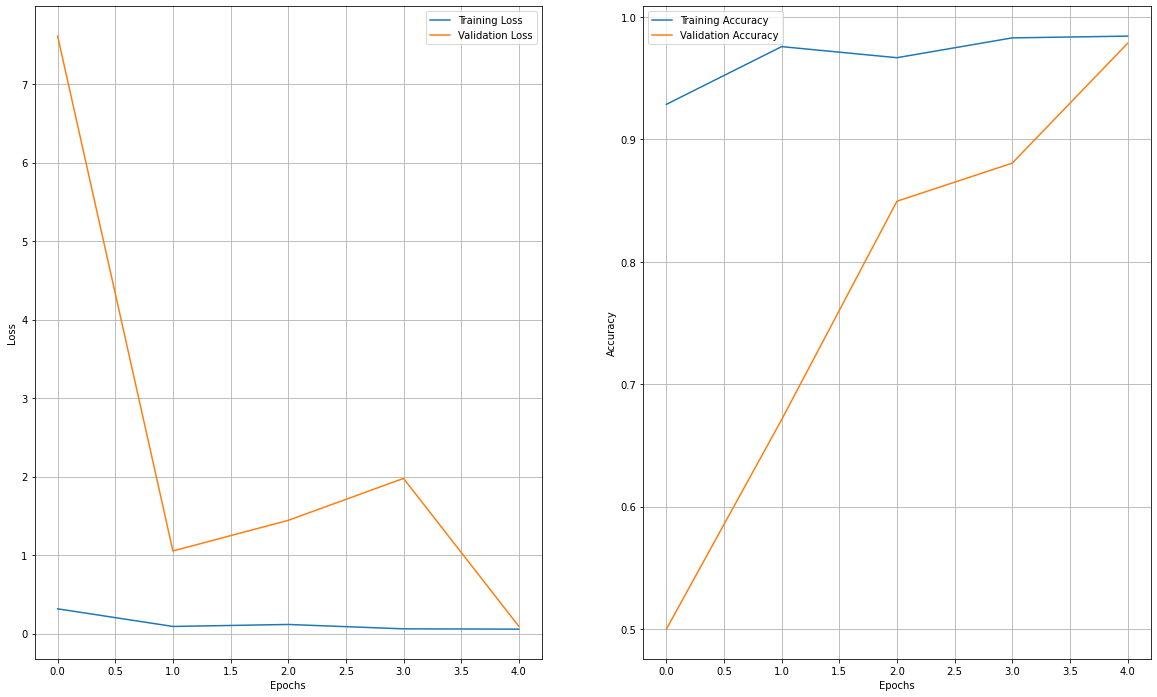

In [40]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [41]:
model.evaluate(X_val,Y_val)

57/57 [==============================] - 13s 206ms/step - loss: 0.0948 - accuracy: 0.9783


[0.09477133303880692, 0.9783333539962769]

In [42]:
model.save('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rottenvsfresh.h6')

INFO:tensorflow:Assets written to: C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rottenvsfresh.h6\assets


In [43]:
from keras.models import Model, load_model

In [44]:
new_model=load_model('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/rotten.h6')

In [45]:
new_model.evaluate(X_val,Y_val)

57/57 [==============================] - 12s 202ms/step - loss: 0.0948 - accuracy: 0.9783


[0.09477133303880692, 0.9783333539962769]

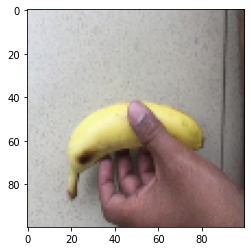

In [67]:
plt.imshow(X_val[16])

In [68]:
model.predict(X_val[16].reshape(1,100,100,3))

array([[0.0193224]], dtype=float32)

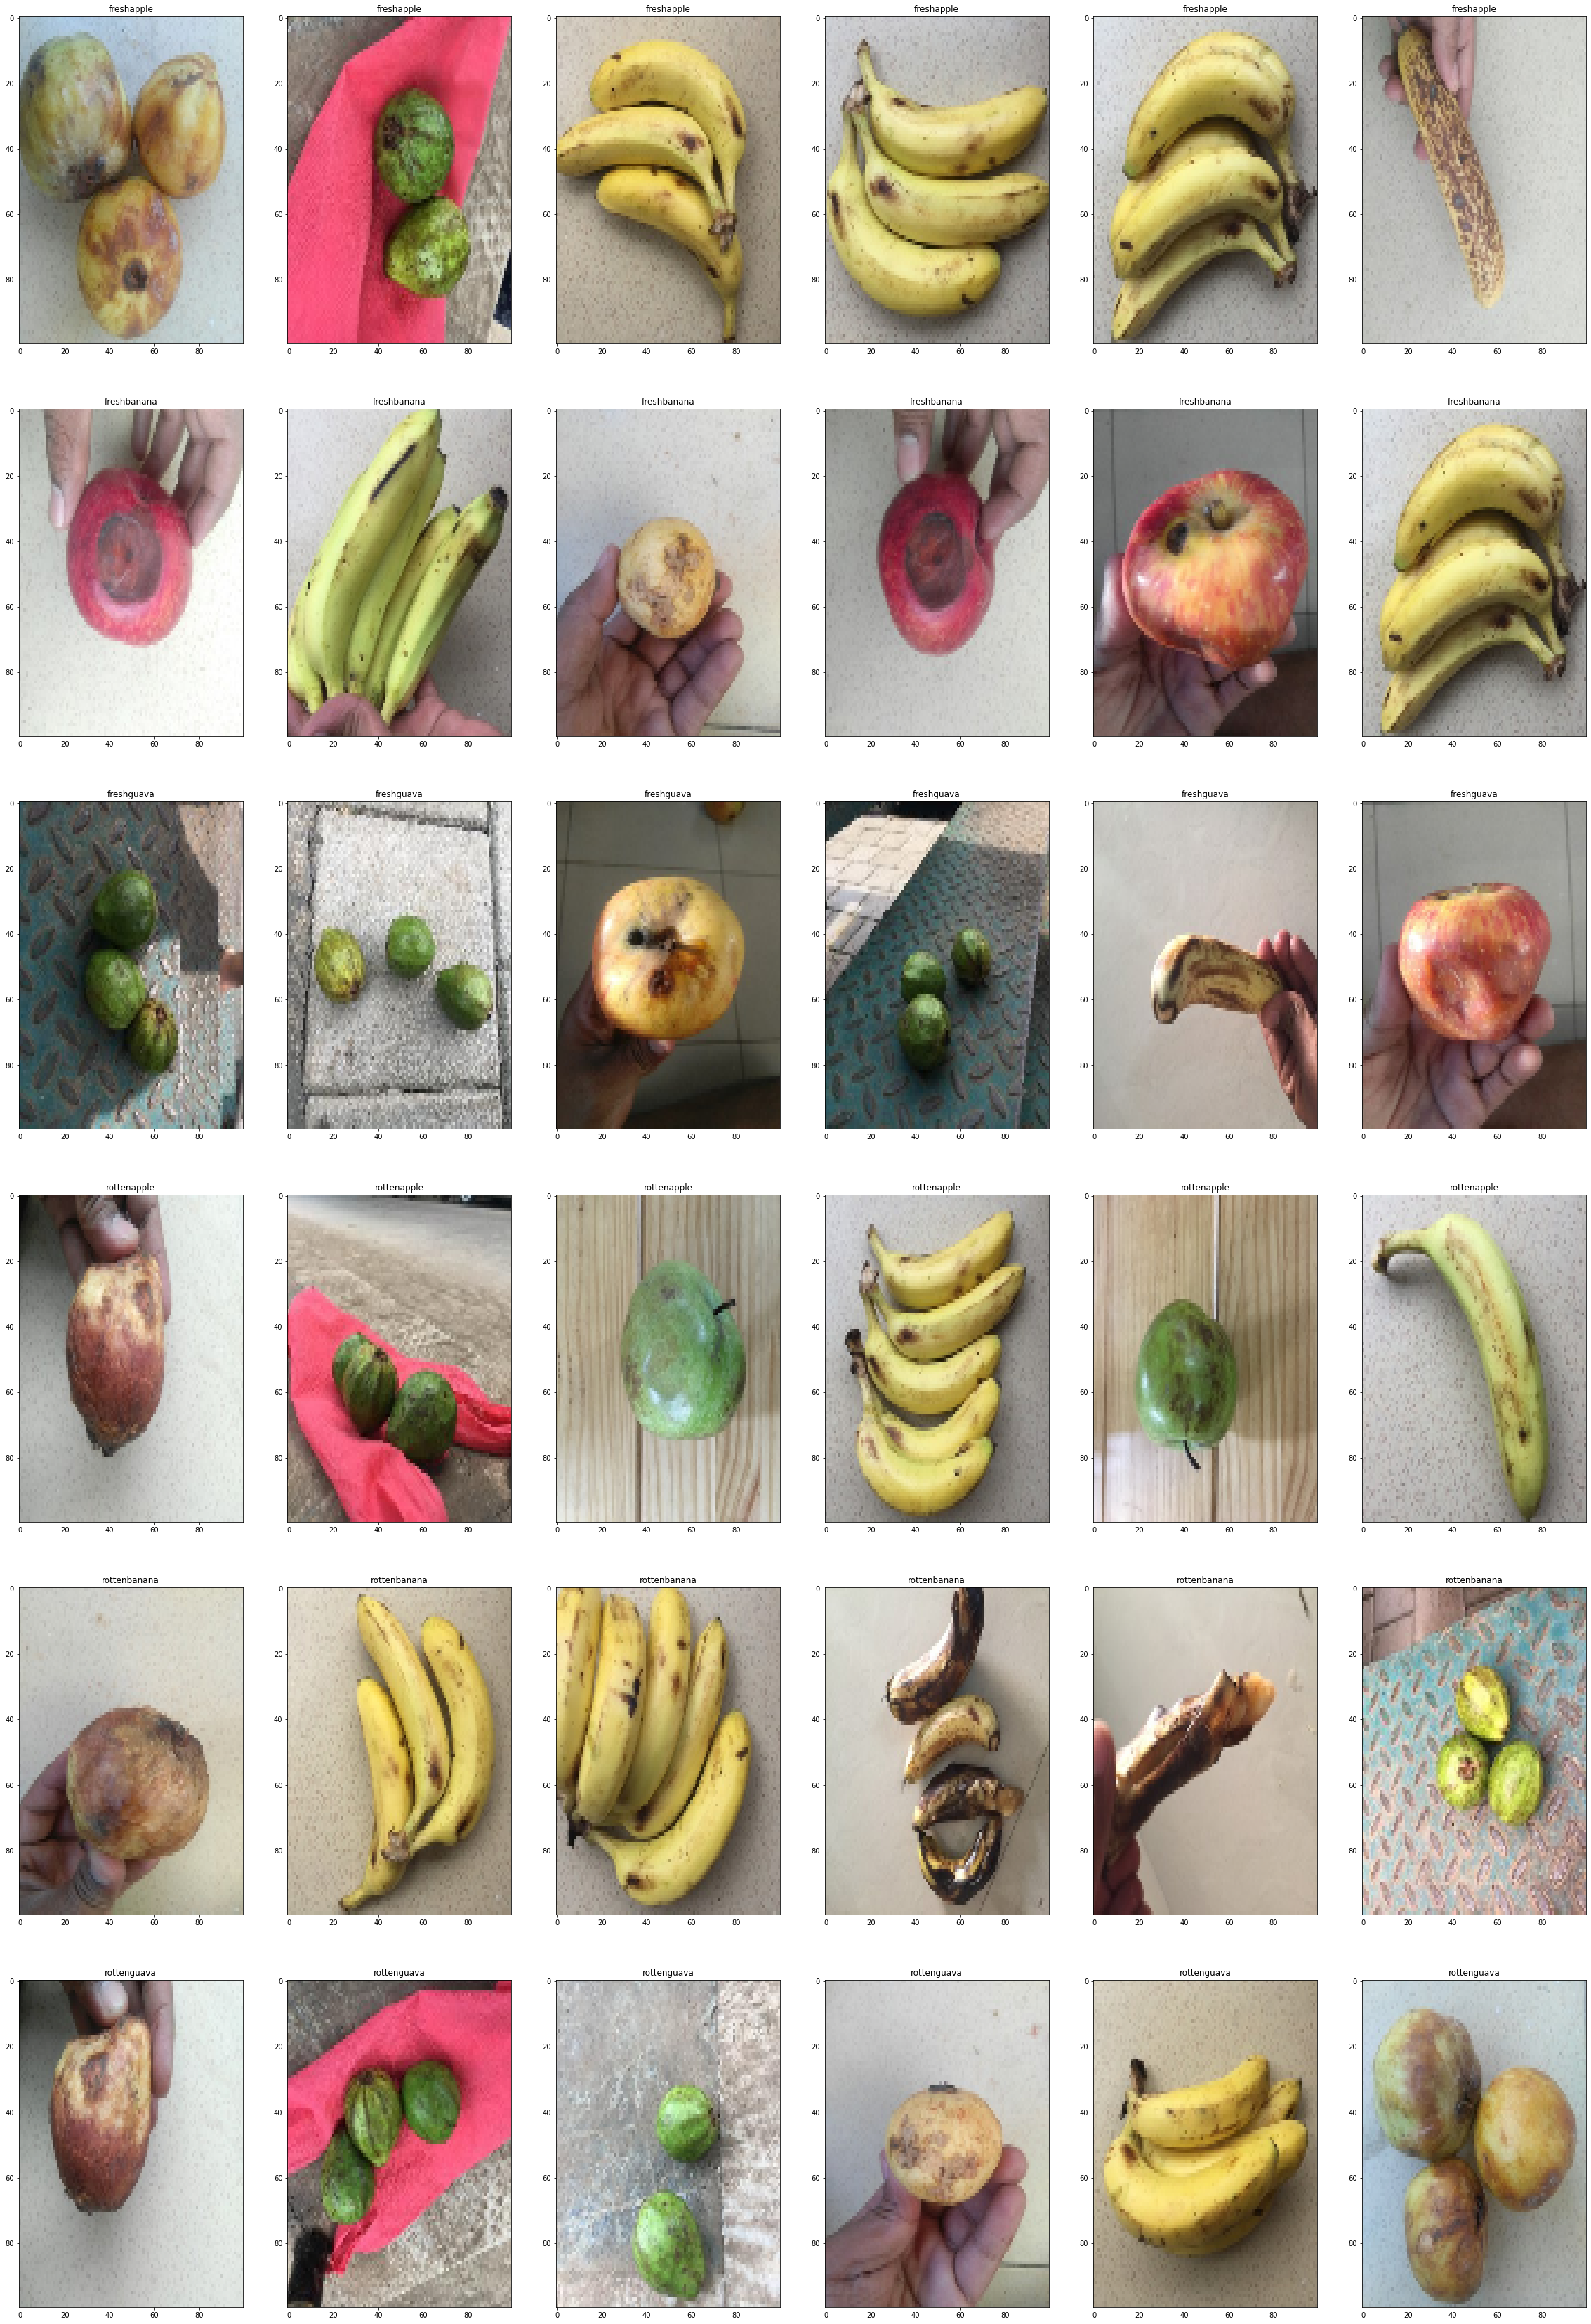

In [73]:
show_subpot(X_val[-36*11:-36*10])

In [75]:
model.predict_classes(X_val[-36*11:-36*10])

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

# Category of Fruits

In [77]:
def load_fruits_data():
    quality=['apple', 'banana','guava']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [78]:
def load_fruits_train_data():
    quality=['apple', 'banana','guava']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train')):
        if quality[0] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [79]:
X_val,Y_val=load_fruits_data()

100%|██████████| 1800/1800 [00:00<00:00, 900387.26it/s]

Shuffling your data.....


In [80]:
X,Y=load_fruits_train_data()

100%|██████████| 4200/4200 [00:00<00:00, 839740.53it/s]

Shuffling your data.....


In [81]:
X=np.array(X)
X_val=np.array(X_val)

In [82]:
X.shape,X_val.shape

((4200, 100, 100, 3), (1800, 100, 100, 3))

In [83]:
X=X/255.0
X_val=X_val/255.0

In [84]:
Y=to_categorical(Y)
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [85]:
Y_test=to_categorical(Y_val)
Y_val=np.array(Y_val)

In [86]:
Y.shape,Y_test.shape, Y_val.shape

((4200, 3), (1800, 3), (1800,))

In [87]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [88]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/fruit_cata.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = 'adam', metrics=['accuracy'])

In [89]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_test),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
210/210 [==============================] - 122s 564ms/step - loss: 0.5222 - accuracy: 0.7849 - val_loss: 1.1497 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 1.14969, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\fruit_cata.h5
Epoch 2/5
210/210 [==============================] - 117s 560ms/step - loss: 0.2014 - accuracy: 0.9304 - val_loss: 1.1980 - val_accuracy: 0.3333

Epoch 00002: val_loss did not improve from 1.14969
Epoch 3/5
210/210 [==============================] - 121s 575ms/step - loss: 0.1155 - accuracy: 0.9589 - val_loss: 0.4461 - val_accuracy: 0.8011

Epoch 00003: val_loss improved from 1.14969 to 0.44608, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4\fruit_cata.h5
Epoch 4/5
210/210 [==============================] - 123s 584ms/step - loss: 0.0912 - accuracy: 0.9687 - val_loss: 0.4129 - val_accuracy: 0.8683

Epoch 00004: val_loss improved from 0.44608 to 0.41286, saving model to C:/Users/ASUS/Documents/TUGAS AKHIR A

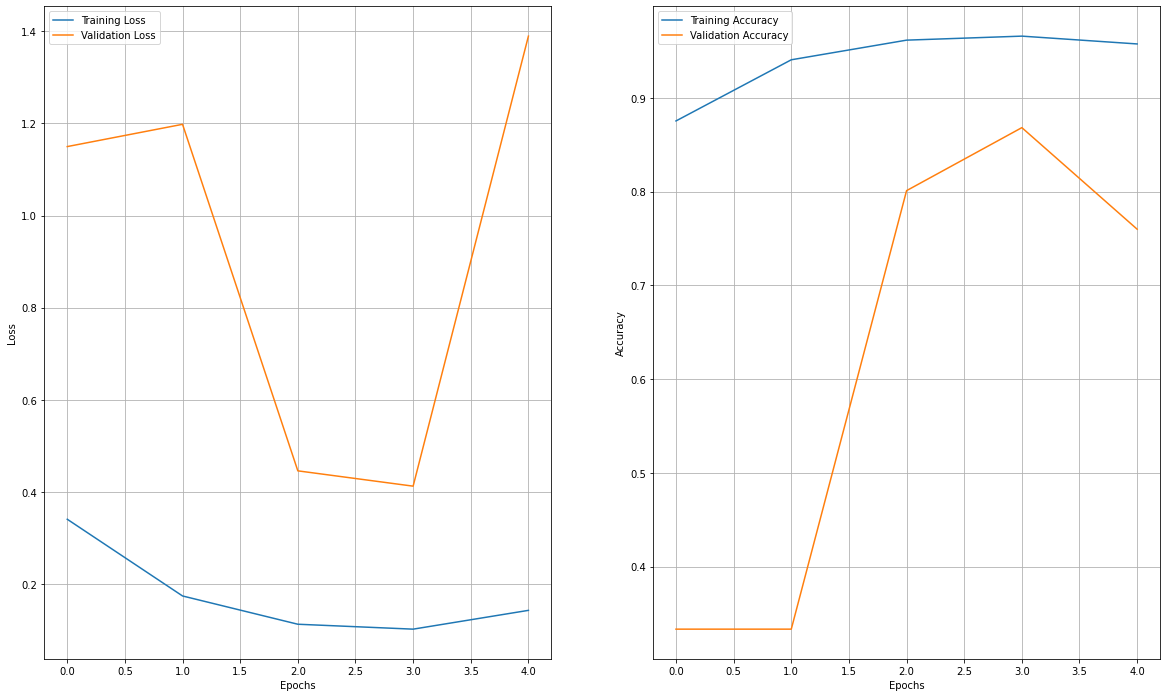

In [90]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [91]:
model=load_model('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/fruit_cata.h5')

In [92]:
model.evaluate(X,Y)

132/132 [==============================] - 28s 207ms/step - loss: 0.3430 - accuracy: 0.8914


[0.34300071001052856, 0.8914285898208618]

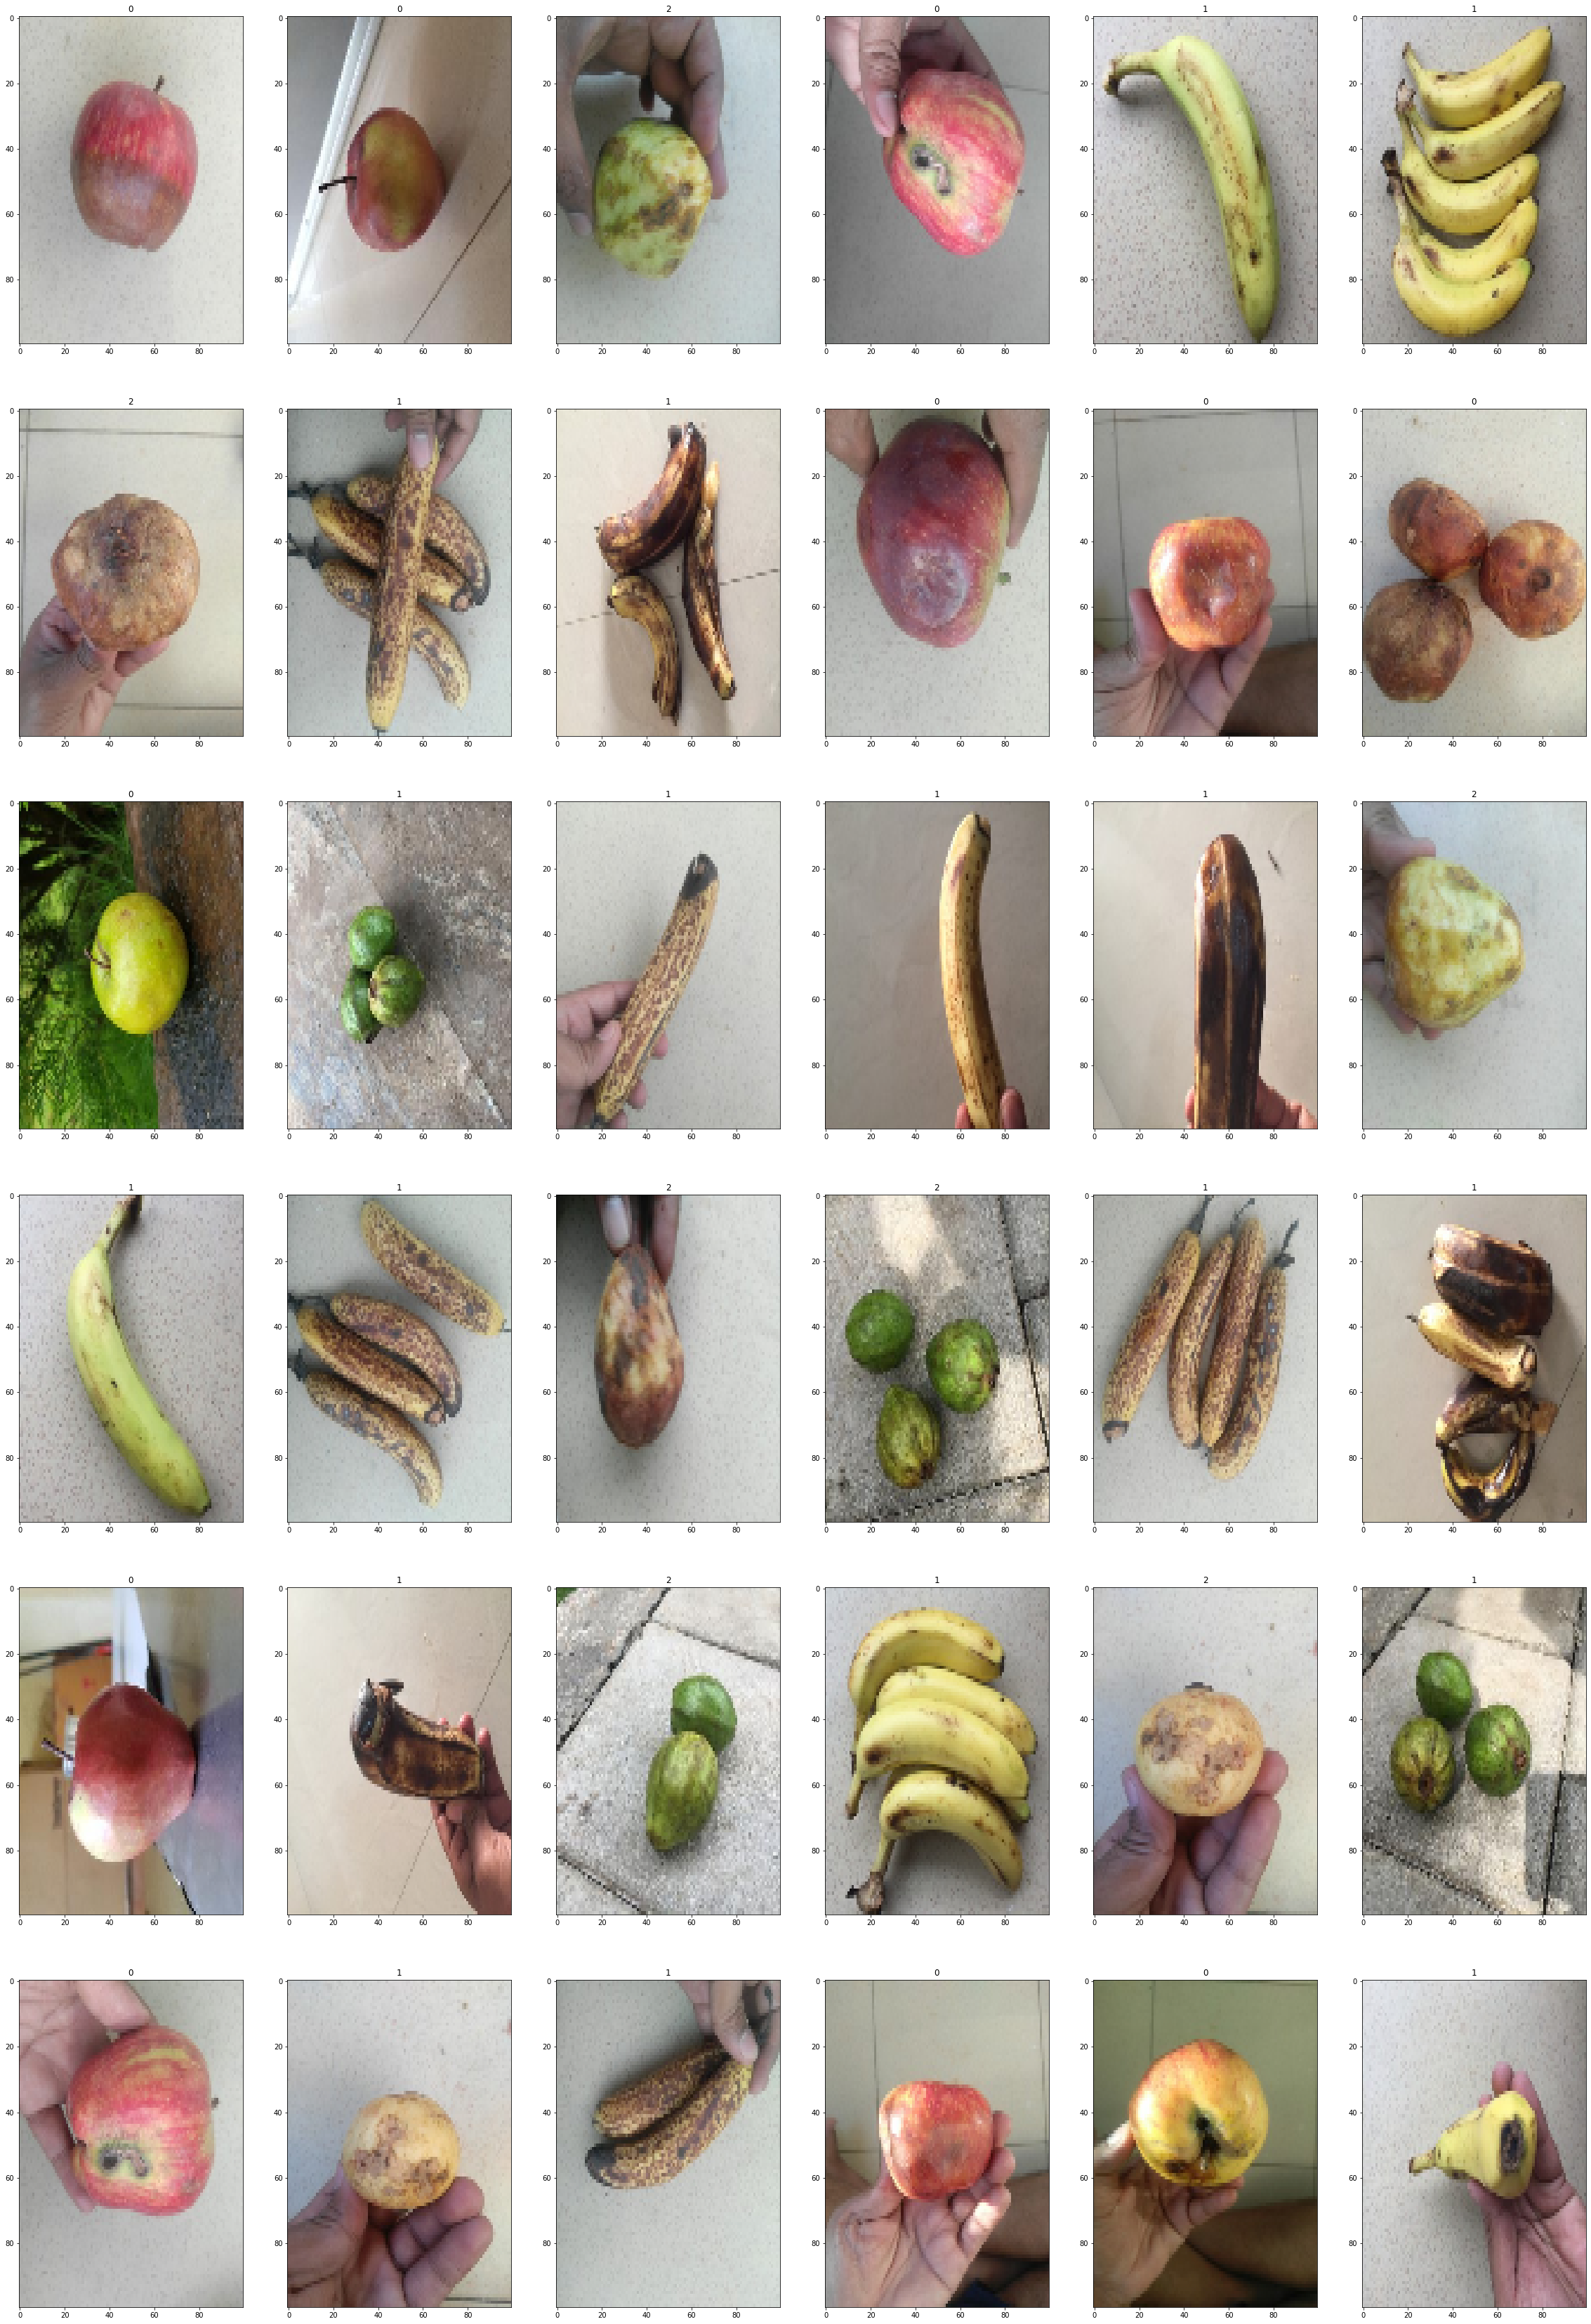

In [93]:
show_subpot(X_val[:36],title=True,Y=model.predict_classes(X_val[:36]))

In [94]:
model.predict_classes(X_val[:36])

array([0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1], dtype=int64)